In [101]:
# Imports / style (run this first always)

%matplotlib inline
from IPython.display import FileLink, FileLinks
from IPython.core import display
from collections import defaultdict
import json
import sys
import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

class AwesomeError(Exception):
     def __init__(self, value):
         self.value = value
         pass
     def __str__(self):
         return repr(self.value)
         pass

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]



def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

import Bio as bp
from Bio.Sequencing.Applications import BwaAlignCommandline as bwa_aln
from Bio.Sequencing.Applications import BwaSamseCommandline as bwa_samse
from Bio.Sequencing.Applications import BwaSampeCommandline as bwa_sampe
from Bio.Sequencing.Applications import BwaIndexCommandline as bwa_index
from Bio.Sequencing.Applications import BwaBwaswCommandline as bwa_bwasw
import HTSeq as ht
import subprocess

plt.style.use('ggplot')
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 16

In [102]:
excelfile = '/hpc/users/neffr01/jason_new/hapcut_outputs/hg002_re_000000F/hg002.000000F.interblock_stats.tsv'
interblock_stats = pd.read_csv(excelfile, sep='\t')

In [69]:
list(np.ones(6).astype(int))

[1, 1, 1, 1, 1, 1]

In [103]:
def n50(arr):
    calcarr = [list(np.ones(x).astype(int)*x) for x in arr]
    calcarr = [item for sublist in calcarr for item in sublist]
    return np.median(calcarr)

N50:  58649.0


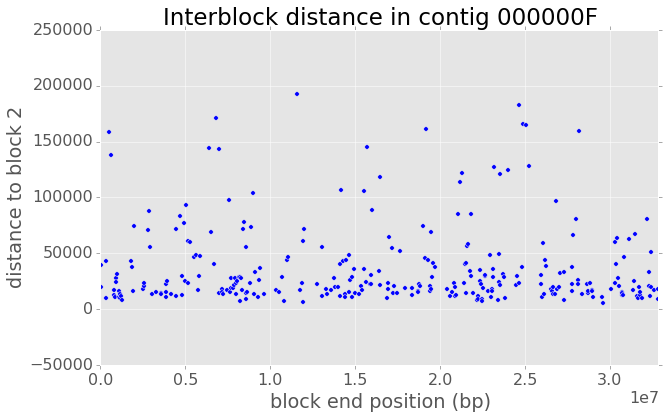

In [104]:
x = interblock_stats.block1_end
y = interblock_stats.distance
fig, ax = plt.subplots()
ax.set_ylabel("distance to block 2")
ax.set_xlabel("block end position (bp)")
ax.scatter(x,y)
ax.set_title("Interblock distance in contig 000000F")
ax.set_xlim([0,np.max(x)])
print "N50: ", n50(y)
plt.show()

N50:  215628.0


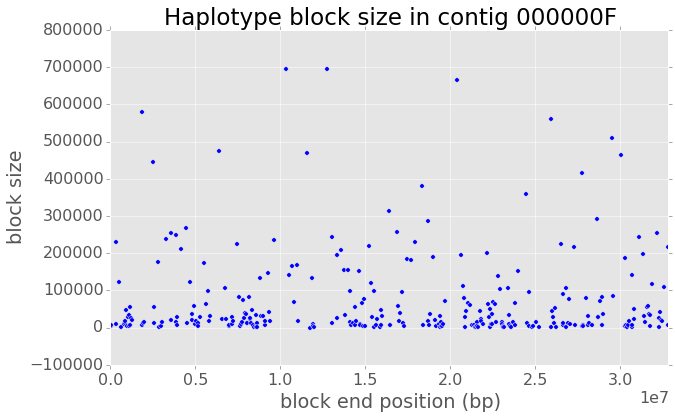

In [105]:
x = interblock_stats.block1_end
y = interblock_stats.block1_size
fig, ax = plt.subplots()
ax.set_ylabel("block size")
ax.set_xlabel("block end position (bp)")
ax.scatter(x,y)
ax.set_title("Haplotype block size in contig 000000F")
ax.set_xlim([0,np.max(x)])
print "N50: ", n50(y)
plt.show()

25.7097020732


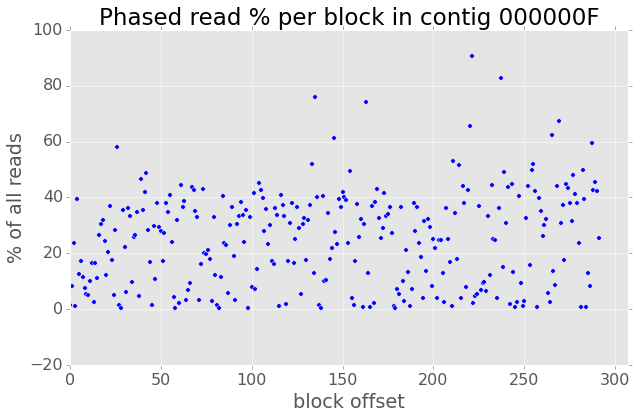

In [106]:
cols = 307
i = interblock_stats.index[0:cols]
x = [x/float(y)*100 for x, y in zip(interblock_stats.block1_informative_reads[0:cols], interblock_stats.block1_reads[0:cols])]
fig, ax = plt.subplots()
ax.set_ylabel("% of all reads")
ax.set_xlabel("block offset")
w = 0.8
ax.scatter(i,x,label="phased reads")
#ax.bar(i,y,width=0.3,label="block 1 reads", color='b')
ax.set_xlim([0,cols])
ax.set_title("Phased read % per block in contig 000000F")
#ax.legend()
print np.median(x)
plt.show()

0.0


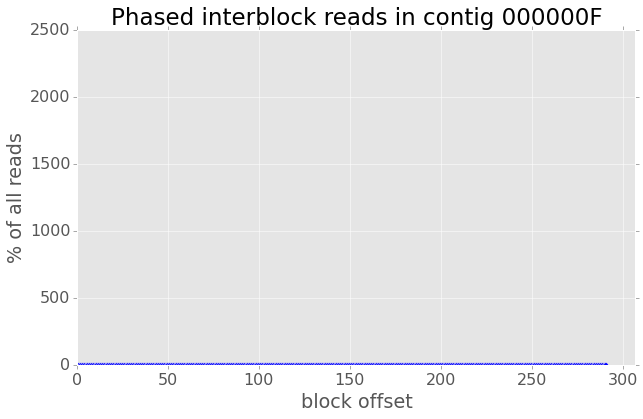

In [107]:
cols = 307
i = interblock_stats.index[0:cols]
x = interblock_stats.informative_interblock_reads[0:cols]
fig, ax = plt.subplots()
ax.set_ylabel("% of all reads")
ax.set_xlabel("block offset")
w = 0.8
ax.scatter(i,x,label="phased reads")
#ax.bar(i,y,width=0.3,label="block 1 reads", color='b')
ax.set_xlim([0,cols])
ax.set_title("Phased interblock reads in contig 000000F")
#ax.legend()
ax.set_ylim([0,2500])
print np.median(x)
plt.show()

324.5


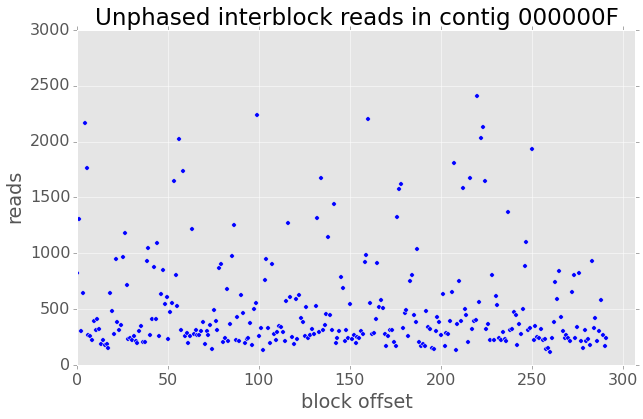

In [108]:
cols = 307
i = interblock_stats.index[0:cols]
x = interblock_stats.all_interblock_reads[0:cols]
fig, ax = plt.subplots()
ax.set_ylabel("reads")
ax.set_xlabel("block offset")
w = 0.8
ax.scatter(i,x,label="unphased reads")
#ax.bar(i,y,width=0.3,label="block 1 reads", color='b')
ax.set_xlim([0,cols])
ax.set_title("Unphased interblock reads in contig 000000F")
#ax.legend()
print np.median(x)
plt.show()